# Comparative Analysis of Class-Imbalanced vs Under-Sampled Training Approaches

## Introduction
This notebook presents a comprehensive performance comparison between two training strategies:
- **Class-Imbalanced Training**: Original dataset distribution
- **Under-Sampled Balanced Training**: Class-balanced distribution via under-sampling

Key evaluation aspects:
1. Training Dynamics (Accuracy/Loss Curves)
2. Learning Rate Scheduling
3. Final Model Performance (Confusion Matrix, Class-wise Metrics)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## Load saved training histories (Imbalanced Data)

In [2]:
# Reading the training_result.csv file and unpack all the values
eval_metrics_df = pd.read_csv("imbalanced_training_results.csv")
train_losses = eval_metrics_df['train_loss'].values
valid_losses = eval_metrics_df['val_loss'].values
train_accuracies = eval_metrics_df['train_accuracy'].values
valid_accuracies = eval_metrics_df['val_accuracy'].values
learning_rates = eval_metrics_df['learning_rate'].dropna().values
epoch = eval_metrics_df['epoch'].values

##  Training Dynamics Visualization (Imbalanced Data)

### Loss Progression


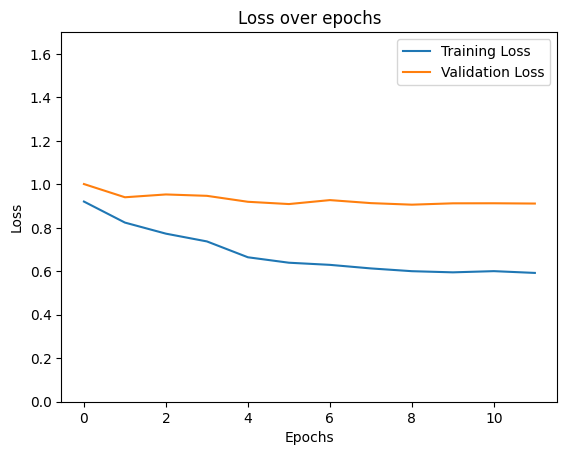

In [3]:
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.ylim([0, 1.7])
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

The training loss decreases steadily over epochs, indicating that the model is learning from the training data. However, the validation loss, while initially decreasing, plateaus and remains relatively constant after a few epochs. The gap between the training and validation loss suggests that the model is overfitting to some extent, where it performs well on the training data but does not generalize as effectively to unseen validation data. The plateauing of the validation loss indicates that the model is no longer improving its ability to generalize, even though it continues to learn from the training set. This may be due to the model becoming biased towards the majority classes, which are more prevalent in the training data, leading to a less robust performance on the validation set.

### Accuracy Progression


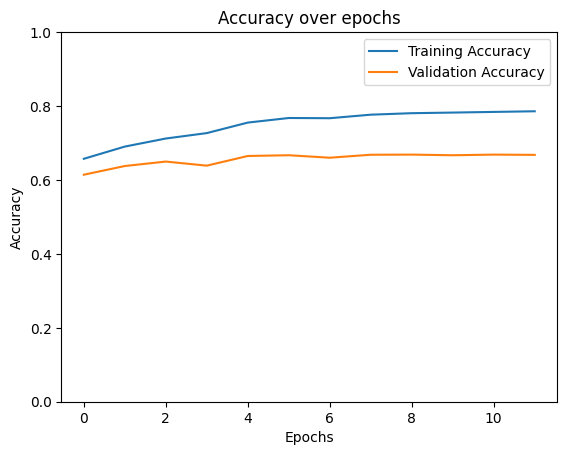

In [4]:
# Plot train accuracies, use label="Training Accuracy"
plt.plot(train_accuracies, label="Training Accuracy")
# Plot validation accuracies, use label="Validation Accuracy"
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.ylim([0, 1])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

The training accuracy increases over epochs, reaching approximately 78% at the end of the training period, which signifies that the model is learning patterns from the training data. In contrast, the validation accuracy plateaus early, stabilizing around 67% and showing little improvement after the initial epochs.

### Learning Rate Analysis


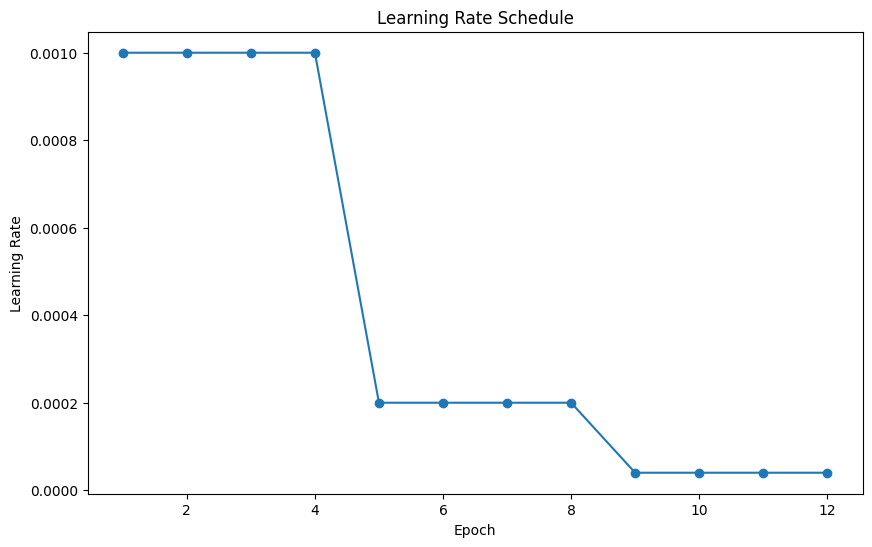

In [5]:
# Plot the learning rates
plt.figure(figsize=(10, 6))
plt.plot(epoch, learning_rates, marker="o", label="Learning Rate")
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()

The learning rate schedule plot shows a stepwise decay pattern. The learning rate starts at 0.001 and remains constant for the first four epochs. At epoch 5, it drops sharply to 0.0002, and then again to almost zero around epoch 9, maintaining this low value for the remaining epochs.

The initial high learning rate likely facilitates rapid learning of the dominant patterns in the training data, which primarily consists of majority classes. As the model progresses through the epochs, the stepwise reduction in the learning rate is intended to fine-tune the model, allowing it to converge toward a stable solution.

## Load predictions and true labels (Imbalanced Data)

### Confusion Matrix


<Figure size 1000x800 with 0 Axes>

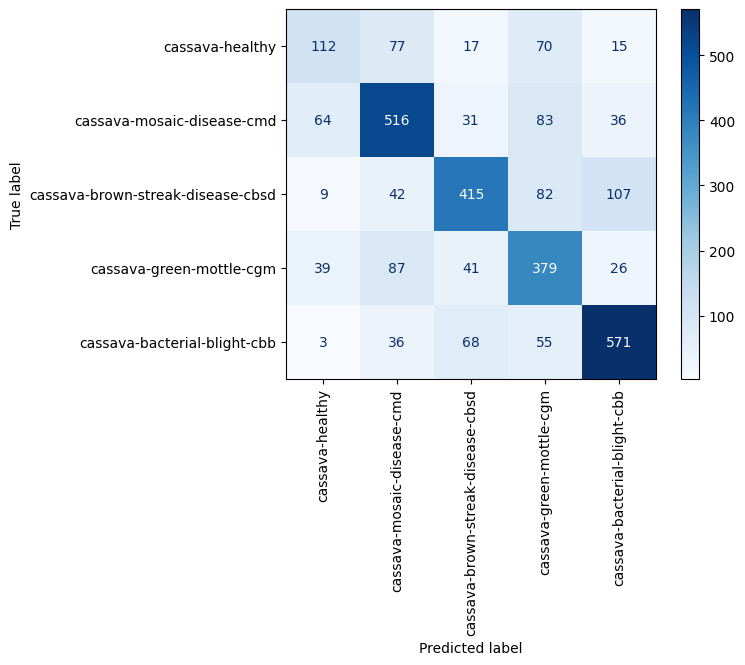

In [6]:
data_dir = os.path.join("data_p2", "data_undersampled", "train")
classes = os.listdir(data_dir)
predictions_val = np.load('val_preds.npy')

targets_val = np.load('val_true.npy')
cm = confusion_matrix(targets_val, predictions_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
# Set figure size
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical");

The matrix demonstrates strong performance in identifying "cassava-mosaic-disease-cmd" and "cassava-bacterial-blight-cbb," evidenced by high values along the diagonal (516 and 571, respectively), indicating a robust ability to correctly classify these two conditions. However, the matrix exhibits confusion in differentiating between "cassava-healthy", "cassava-brown-streak-disease-cbsd", and "cassava-green-mottle-cgm". This suggests a potential bias towards the more prevalent classes due to the data imbalance, or a similarity in visual features between the misclassified categories that the model struggles to distinguish.

## Load saved training histories (Balanced Data with Under-Sampling)

In [7]:
eval_metrics_df = pd.read_csv("balanced_training_results.csv")
train_losses = eval_metrics_df['train_losses'].values
valid_losses = eval_metrics_df['valid_losses'].values
train_accuracies = eval_metrics_df['train_accuracies'].values
valid_accuracies = eval_metrics_df['valid_accuracies'].values
learning_rates = eval_metrics_df['learning_rates'].dropna().values
epochs = eval_metrics_df['epochs'].values

##  Training Dynamics Visualization (Balanced Data with Under-Sampling)

### Loss Progression

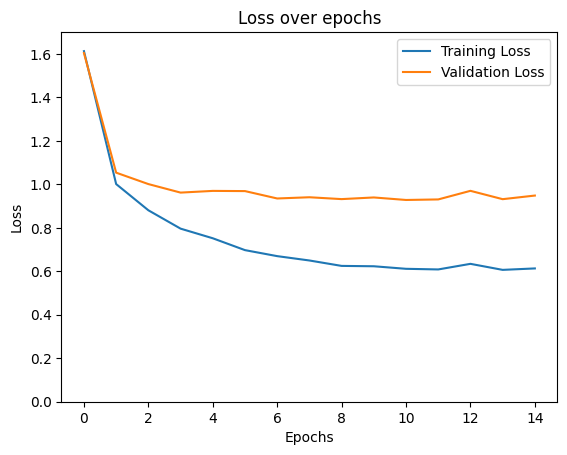

In [8]:
plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.ylim([0, 1.7])
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

The above loss graph shows a steady decrease in training loss over the epochs, indicating that the model is effectively learning from the balanced dataset. The validation loss starts high and decreases in the early epochs but stabilizes after epoch 3, fluctuating slightly around a consistent value. The relatively small gap between training and validation loss suggests that the model is generalizing well to unseen data and is not overfitting significantly. This behavior aligns with the goal of under-sampling, which ensures that all classes are equally represented during training, leading to a fairer model.

### Accuracy Progression


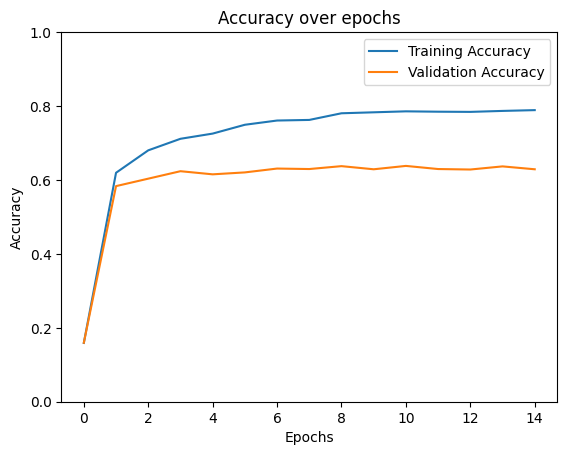

In [9]:
# Plot train accuracies, use label="Training Accuracy"
plt.plot(train_accuracies, label="Training Accuracy")
# Plot validation accuracies, use label="Validation Accuracy"
plt.plot(valid_accuracies, label="Validation Accuracy")
plt.ylim([0, 1])
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

The accuracy plot here shows that both training and validation accuracy increase sharply during the initial epochs. However, after approximately 2 epochs, both curves plateau. The training accuracy reaches a value around 80%, while the validation accuracy plateaus at approximately 63%. The observable gap between training and validation accuracy, though smaller than what might be expected with imbalanced data, still suggests some degree of overfitting.

### Learning Rate Analysis

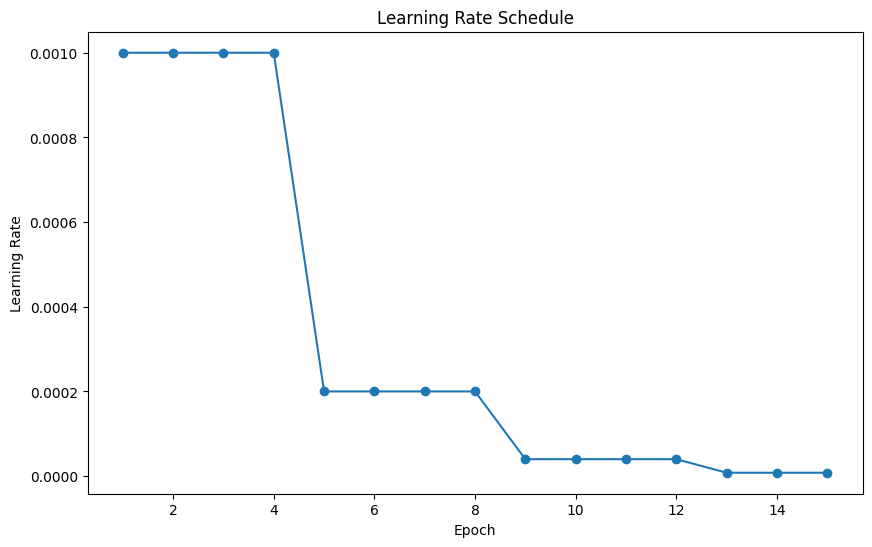

In [10]:
# Plot the learning rates
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates, marker="o", label="Learning Rate")
plt.title("Learning Rate Schedule")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()

In comparison with the imbalanced data model, the overall pattern is similar - a stepwise decay. However, the specific epochs at which the learning rate drops and the magnitudes of those drops differ.

## Load predictions and true labels (Balanced Data with Under-Sampling)

### Confusion Matrix


<Figure size 1000x800 with 0 Axes>

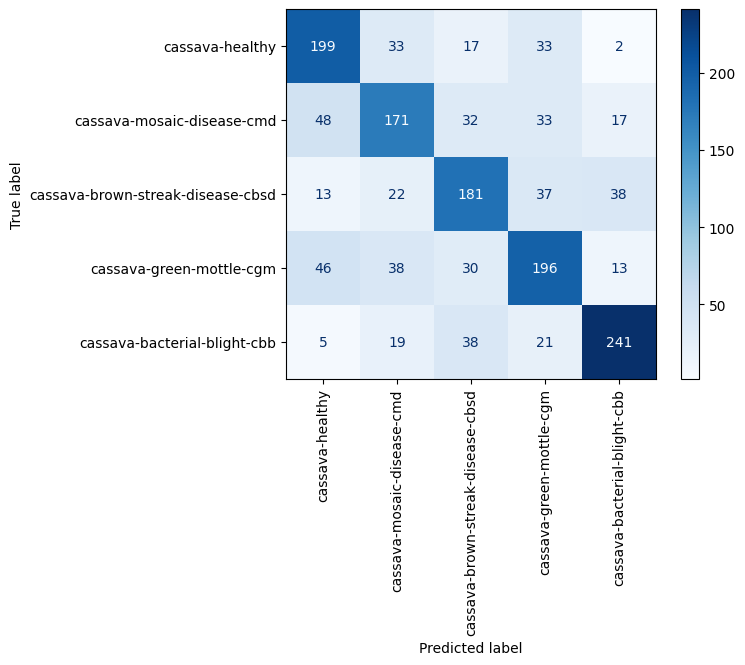

In [11]:
predictions_val = np.load('predictions_val.npy')
targets_val = np.load('targets_val.npy')
cm = confusion_matrix(targets_val, predictions_val)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Set figure size
plt.figure(figsize=(10, 8))

disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical");

The confusion matrix for the model trained on balanced data with under-sampling shows a significant improvement in class-wise performance compared to the model trained on imbalanced data. The diagonal elements, representing correct classifications, are more evenly distributed across all classes, indicating that the model has learned to classify each cassava disease category more effectively.

## Key Observations


**Class Bias**
-The model trained with imbalanced data showed a strong bias toward majority classes (cassava-mosaic-disease-cmd and cassava-bacterial-blight-cbb), as evidenced by higher correct predictions for these classes but poor performance on minority classes.
-The model trained wi data th balanced data has reduced this bias, achieving more equitable performance across all classes.

**Misclassification Patterns**
-In the model trained with imbalanced data, there was significant confusion between certain categories (e.g., cassava-healthy being misclassified as cassava-mosaic-disease-cmd or cassava-green-mottle-cgm). The model trained with balanced data reduces such misclassifications, improving recall and precision for these categories.

**Overall Trade-offs**
-The model trained with balanced data sacrifices some accuracy for majority classes to improve minority class performance. This trade-off is often desirable in real-world applications where equitable performance across all categories is critical.


## Conclusion and Future Directions

Based on our analysis, the model trained with balanced data through under-sampling demonstrates superior performance compared to the model trained on the original, imbalanced dataset. Specifically:

-   **Optimal Strategy Recommendation:** For this task, the balanced dataset with under-sampling is the recommended approach. While the model trained on imbalanced data achieved high training accuracy, it significantly underperformed on the validation set due to overfitting and class bias. The under-sampled balanced model exhibited better generalization capabilities, as demonstrated by its superior validation accuracy and a smaller gap between training and validation performance. Given the balanced dataset, this model is more reliable when working with unseen data.

-   **Potential Improvements and Next Steps:** Several avenues exist for improving model performance:

    *   **Evaluate alternative balancing techniques:** While under-sampling improved performance, it reduces the size of the training data. Exploring over-sampling methods or data augmentation technique might provide better results without discarding valuable data.
    *   **Explore different learning rate schedules:** Experiment with more adaptive learning rate strategies (e.g., cyclical learning rates or learning rate schedulers like ReduceLROnPlateau). The current stepped schedule led to convergence, but more sophisticated methods could lead to faster training or higher final accuracy. Note, that if we work with adaptive learning rate then it could also mitigate the changes that needs to be done manually to get more performance out of the system.
    *   **Improve Model Architecture:** We focused on the data aspect in this exercise, but tuning model architecture and parameters can bring huge benefit as well
    *   **Address residual Overfitting**: Look into regularization techniques (e.g., dropout, weight decay) to further reduce overfitting.